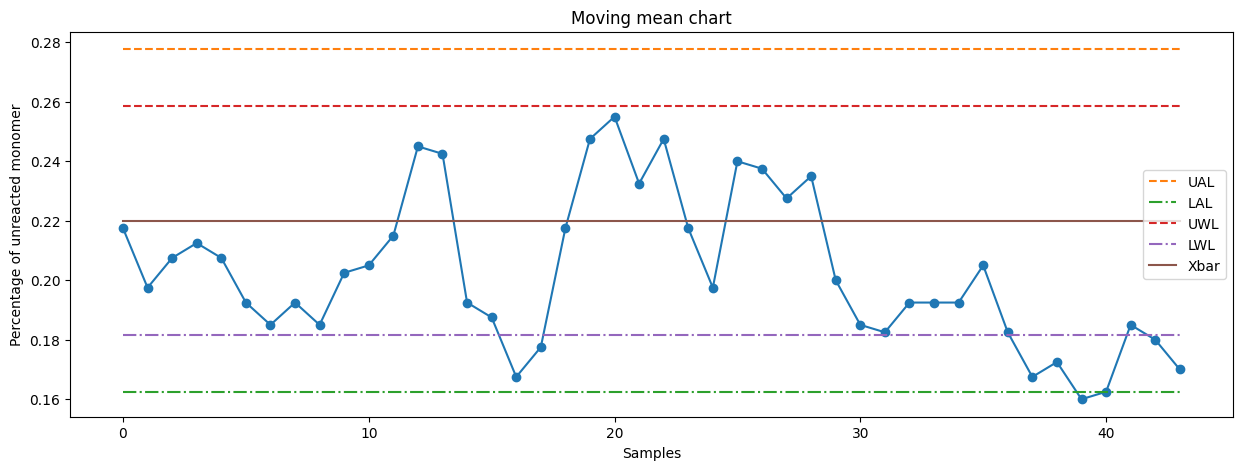

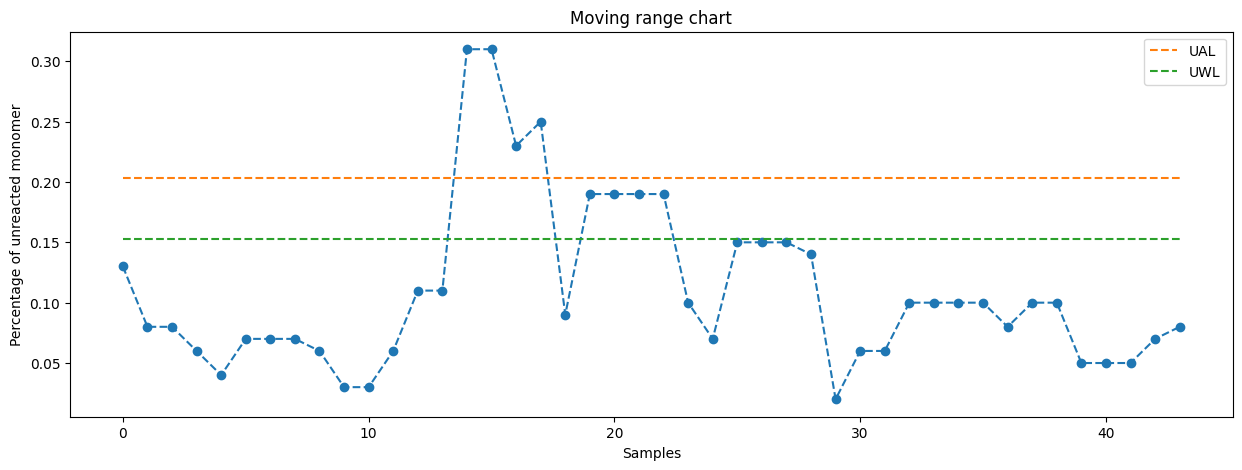

In [21]:
#Moving mean chart and moving range chart
# These control charts are used for low frequency data i.e. sampling interval between two consecutive measurements is considerably high (one hour or one day) 
# This python code creates moving mean chart for unreacted monomer at an intermediate stage in a polymerization process
# Chapter 7, Statistical Process Control By John Oakland
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#from google.colab import files
#uploaded = files.upload()

#import io
#data = pd.read_csv(io.BytesIO(uploaded['example2_exercise7.csv']))

# data from process that is in statistical control
xlsx = pd.ExcelFile("/content/Table 7.1.xlsx")
data = pd.read_excel(xlsx, 'Sheet2',header=None)

data = np.array(data)
data = data[:,1]
data = data.reshape(len(data),1)
# print(data.shape)

# TO compute control limits, we need data from the polymerization process when it was in statistical control, i.e. able to produce a product that meets a predefined product specificaiton
# The following process mean or grand mean is computed by taking average of the mean values obtained for each data winow (this data window moves forward by neglecting oldest data point and accepting newest data point) of normal operation data
# Similary, mean range is obtained.

n = 4   # size of moving window
Xbar = 0.22   # grand mean or process mean
meanR = 0.079  # mean range

A2 = 0.73   # taken from Appendix-B of the book for window size of 4
D0_001 = 2.57
D0_025 = 1.93

# control limits for moving mean

UAL = Xbar + A2 * meanR          # upper action limit
LAL = Xbar - A2 * meanR          # lower action limit
UWL = Xbar + (2/3) * A2* meanR   # upper warning limit
LWL = Xbar - (2/3) * A2* meanR   # lower warning limit

# control limits for moving range

RUAL = D0_001 * meanR
RUWL = D0_025 * meanR


mov_mean = []
mov_range = []

# determining moving meana nd moving range   
for i in range(0,len(data)-(n-1)):
  #print(i)
  xx = data[i:i+n,:]
  #print(xx)
  xmean = np.mean(xx)
  #print(xmean)
  
  xmin = np.min(xx)
  xmax = np.max(xx)
  xrange = np.subtract(xmax,xmin)

  mov_mean.append(xmean)
  mov_range.append(xrange)

mov_mean = np.array(mov_mean)
mov_range = np.array(mov_range)
#print(mov_mean)

# mean is calculated from the window of n data points and this mean is plotted on the chart at latest time at which we get the latest measurement
plt.figure(figsize=(15,5))
plt.plot(mov_mean,'-o')
plt.plot(UAL * np.ones((len(mov_mean),1)), '--', label='UAL')
plt.plot(LAL * np.ones((len(mov_mean),1)), '-.', label='LAL')
plt.plot(UWL * np.ones((len(mov_mean),1)), '--', label='UWL')
plt.plot(LWL * np.ones((len(mov_mean),1)), '-.', label='LWL')
plt.plot(Xbar* np.ones((len(mov_mean),1)), label='Xbar')   # central or target line
plt.xlabel("Samples")
plt.ylabel("Percentage of unreacted monomer")
plt.legend()
# displaying the title
plt.title("Moving mean chart")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(mov_range,'--o')
plt.plot(RUAL * np.ones((len(mov_range),1)), '--', label='UAL')
plt.plot(RUWL * np.ones((len(mov_range),1)), '--', label='UWL')
plt.xlabel("Samples")
plt.ylabel("Percentage of unreacted monomer")
plt.legend()
plt.title("Moving range chart")
plt.show()
